In [2]:
import pandas as pd

df = pd.read_csv("swasthya_ai_data.csv")
print(df.head())


         date  er_visits  icu_visits  opd_visits  aqi  temp_c  festival  \
0  2023-01-01        118          15         251  184    24.0         0   
1  2023-01-02        113          18         253  179    25.5         0   
2  2023-01-03        116          16         249  189    23.4         0   
3  2023-01-04        126          19         254  199    26.2         0   
4  2023-01-05        135          18         271  183    25.7         0   

   oxygen_stock  n95_stock  para_stock  oxygen_used  n95_used  para_used  \
0           100        893        1387           21        70        158   
1           100        887        1371           16        63        183   
2           100        879        1358           21        74        192   
3            99        870        1340           11        42        223   
4            98        860        1329           17        65        243   

   er_staff_capacity  icu_staff_capacity  opd_staff_capacity  
0                 14         

In [3]:
df_prophet = df.rename(columns={
    "date": "ds",
    "er_visits": "y"
})

In [4]:
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])


In [5]:
df_prophet["aqi"] = df["aqi"]
df_prophet["temp_c"] = df["temp_c"]
df_prophet["festival"] = df["festival"]


In [7]:
from prophet import Prophet

m = Prophet()

# Add external regressors
m.add_regressor('aqi')
m.add_regressor('temp_c')
m.add_regressor('festival')

# Fit the model
m.fit(df_prophet)


19:30:52 - cmdstanpy - INFO - Chain [1] start processing
19:30:52 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = m.make_future_dataframe(periods=14)


In [9]:
future["aqi"] = df_prophet["aqi"].iloc[-1]
future["temp_c"] = df_prophet["temp_c"].iloc[-1]
future["festival"] = 0


In [10]:
forecast = m.predict(future)
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(14))


            ds        yhat  yhat_lower  yhat_upper
731 2025-01-01  100.906088   89.180813  111.924391
732 2025-01-02   99.821112   88.990493  111.558386
733 2025-01-03   97.851958   87.606395  109.529154
734 2025-01-04  100.104390   88.374084  111.502355
735 2025-01-05   97.357672   86.091707  108.536435
736 2025-01-06   97.054513   86.550485  107.971592
737 2025-01-07   95.714588   83.597372  106.595424
738 2025-01-08   95.870788   84.309317  107.172191
739 2025-01-09   95.139114   83.530066  105.649943
740 2025-01-10   93.576258   82.498242  104.266607
741 2025-01-11   96.280839   85.196343  108.120806
742 2025-01-12   94.024207   82.794482  105.233212
743 2025-01-13   94.240546   83.708527  104.894744
744 2025-01-14   93.440564   83.102859  104.877520


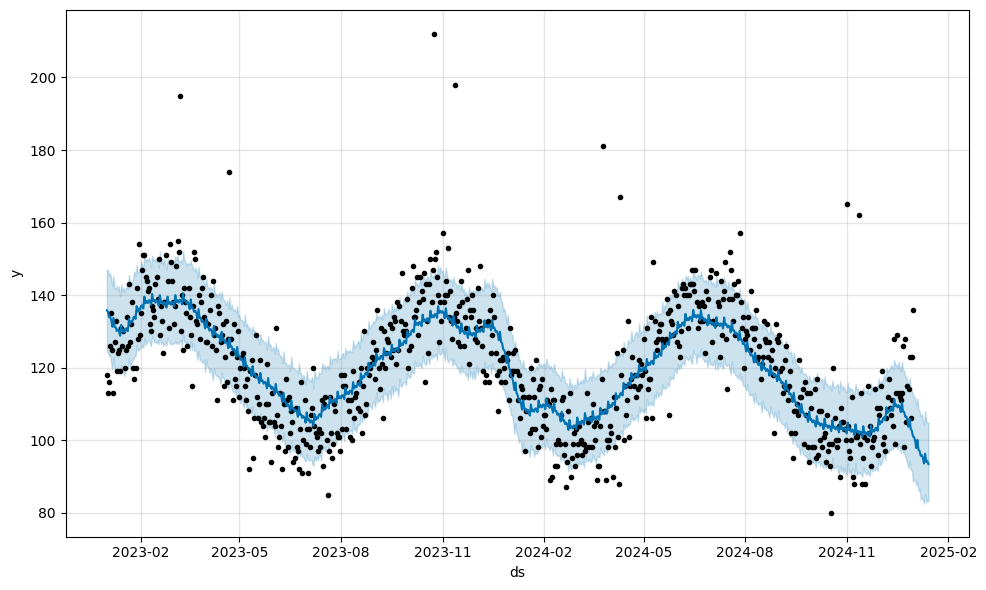

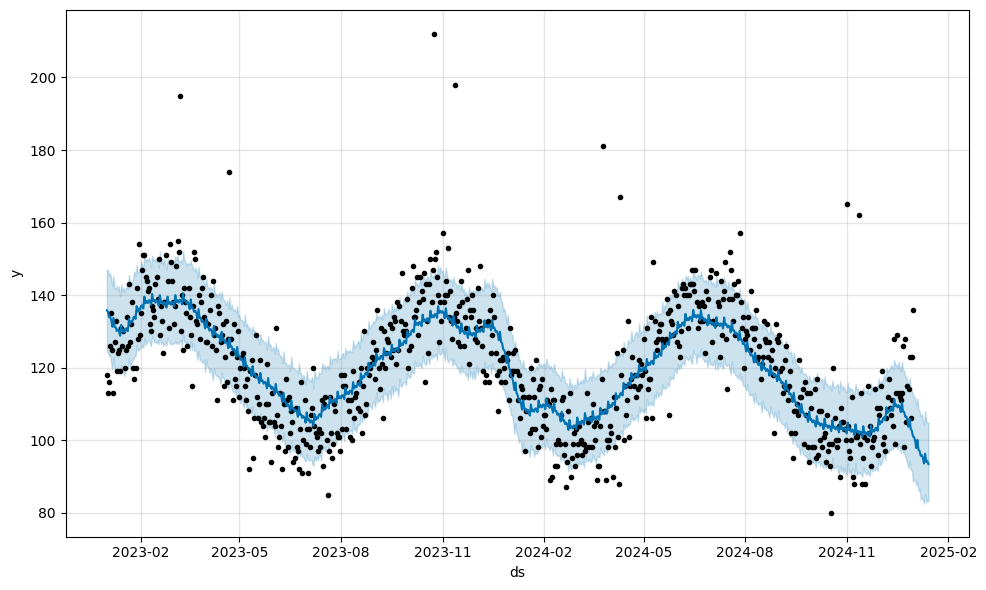

In [11]:
m.plot(forecast)
